<a href="https://colab.research.google.com/github/PrachiKhatri22/Startup-Ecosystem-Analysis-in-India/blob/main/Startup_Ecosystem_Analysis_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyzing the data
Answering Few Questions/ KPIs
* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

## Lets Install the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [ ]:
data=pd.read_csv("startup_funding.csv")

In [ ]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
# changing the names of the columns inside the data
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

In [ ]:
# lets clean the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# lets apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City",
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks","Date"]:
    data[col] = data[col].apply(lambda x: clean_string(x))

# lets check the head of the data
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [ ]:
data.isnull().sum()

SNo                 0
Date                0
StartupName         0
IndustryVertical    0
SubVertical         0
City                0
InvestorsName       0
InvestmentType      0
AmountInUSD         0
Remarks             0
dtype: int64

In [ ]:
data['Remarks'].value_counts()

nan                                  2625
Series A                              177
Series B                               64
Pre-Series A                           37
Series C                               28
                                     ... 
pre Series-A                            1
QPrize Contest Winners                  1
pre series A                            1
pre-series A                            1
Strategic Funding, Minority stake       1
Name: Remarks, Length: 70, dtype: int64

In [ ]:
# lets remove Remarks column, as it contains a lot of nans

data = data.drop(['Remarks'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3044 non-null   int64 
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  3044 non-null   object
 4   SubVertical       3044 non-null   object
 5   City              3044 non-null   object
 6   InvestorsName     3044 non-null   object
 7   InvestmentType    3044 non-null   object
 8   AmountInUSD       3044 non-null   object
dtypes: int64(1), object(8)
memory usage: 214.2+ KB


In [ ]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","").replace("/","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

In [ ]:
data["AmountInUSD"].unique()

array([ 2.00000000e+08,  8.04839400e+06,  1.83588600e+07,  3.00000000e+06,
        1.80000000e+06,  9.00000000e+06,  1.50000000e+08,  6.00000000e+06,
        7.00000000e+07,  5.00000000e+07,  2.00000000e+07,  1.20000000e+07,
        3.00000000e+07,  5.90000000e+06,  2.00000000e+06,  2.31000000e+08,
        4.86000000e+05,  1.50000000e+06, -9.99000000e+02,  2.60000000e+07,
        1.74112650e+07,  1.30000000e+06,  1.35000000e+08,  3.00000000e+05,
        2.20000000e+08,  1.58000000e+07,  2.83000000e+08,  1.00000000e+09,
        4.50000000e+07,  5.85000000e+08,  4.50000000e+06,  3.30000000e+06,
        5.00000000e+06,  1.80000000e+07,  1.00000000e+06,  1.00000000e+07,
        4.50000000e+08,  1.60000000e+06,  1.40000000e+08,  3.80800000e+07,
        1.25000000e+08,  1.10000000e+07,  5.10000000e+07,  3.70000000e+07,
        5.00000000e+05,  1.10000000e+08,  1.50000000e+07,  6.59000000e+06,
        3.90000000e+09,  1.90000000e+07,  2.50000000e+06,  1.45000000e+05,
        6.00000000e+07,  

In [ ]:
data["AmountInUSD"].dtypes

dtype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               3044 non-null   int64  
 1   Date              3044 non-null   object 
 2   StartupName       3044 non-null   object 
 3   IndustryVertical  3044 non-null   object 
 4   SubVertical       3044 non-null   object 
 5   City              3044 non-null   object 
 6   InvestorsName     3044 non-null   object 
 7   InvestmentType    3044 non-null   object 
 8   AmountInUSD       3044 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 214.2+ KB


# How Does the Funding Ecosystem changes with respect to Time?

In [ ]:
data[data['Date']=='12/05.2015'] = '12/05/2015'
data[data['Date']=='13/04.2015'] = '13/04/2015'
data[data['Date']=='15/01.2015'] = '15/01/2015'
data[data['Date']=='22/01//2015'] = '22/01/2015'
data[data['Date']=='05/072018'] = '05/07/2018'
data[data['Date']=='01/07/015'] = '01/07/2015'

In [ ]:
# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3044 non-null   object
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  3044 non-null   object
 4   SubVertical       3044 non-null   object
 5   City              3044 non-null   object
 6   InvestorsName     3044 non-null   object
 7   InvestmentType    3044 non-null   object
 8   AmountInUSD       3044 non-null   object
 9   yearmonth         3044 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


In [ ]:
year_month.index

Int64Index([201601, 201602, 201507, 201606, 201508, 201510, 201511, 201512,
            201509, 201608, 201506, 201603, 201610, 201604, 201605, 201609,
            201611, 201612, 201701, 201703, 201704, 201705, 201706, 201607,
            201504, 201505, 201503, 201709, 201502, 201501, 201710, 201711,
            201702, 201708, 201712, 201707, 201802, 201801, 201807, 201803,
            201804, 201806, 201808, 201805, 201811, 201908, 201911, 201906,
            201904, 201809, 201907, 201912, 201909, 201905, 201810, 201812,
            202001, 201902, 201901, 201910],
           dtype='int64')

In [ ]:
year_month.values

array([104, 100,  98,  98,  98,  93,  92,  89,  88,  87,  86,  85,  80,
        79,  79,  73,  72,  72,  72,  71,  71,  68,  65,  64,  63,  61,
        60,  58,  55,  53,  53,  50,  48,  45,  43,  43,  42,  37,  36,
        35,  35,  32,  25,  23,  18,  17,  15,  15,  14,  13,  13,  10,
         9,   9,   7,   7,   7,   3,   3,   3], dtype=int64)

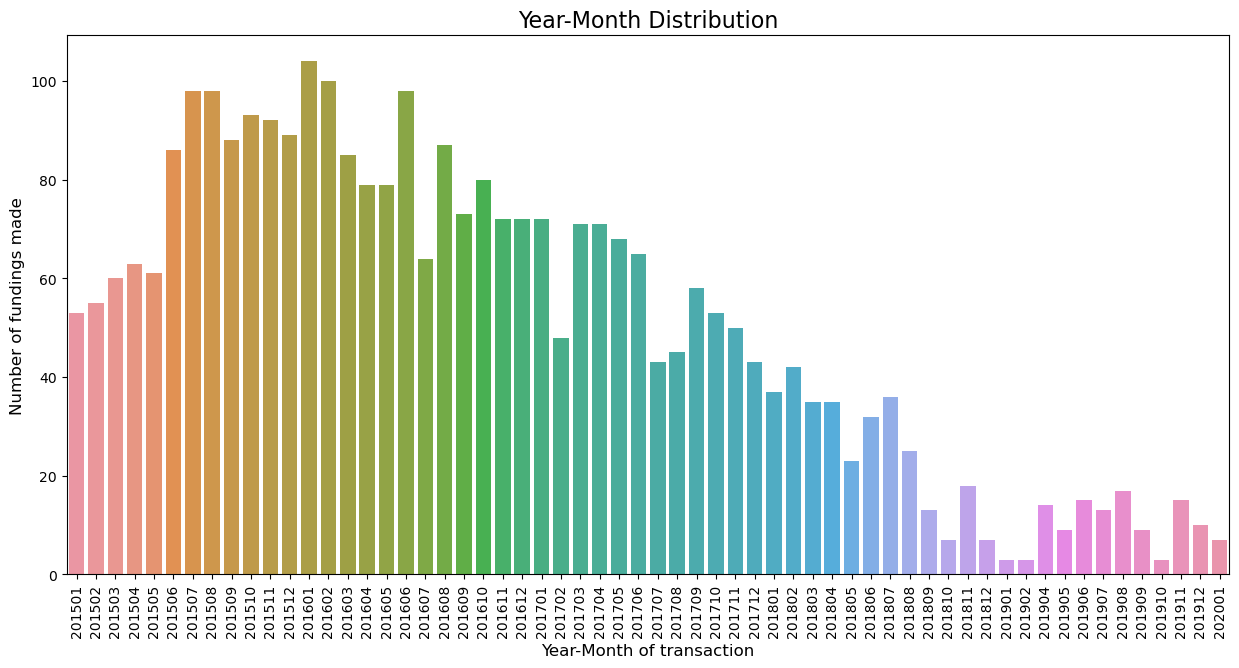

In [ ]:
# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(data, x=year_month.index, y=year_month.values)
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

# What is the General Amount that Startups get in India?

In [ ]:
data[data['AmountInUSD'] == -999.0].shape

(970, 10)

In [ ]:
data['AmountInUSD']

0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042         -999.0
3043       140000.0
Name: AmountInUSD, Length: 3044, dtype: object

In [ ]:
# Average Funding
print("On Average indian startups got funding of : ", data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  13270058.261169514


Total startups funded :  2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: StartupName, dtype: int64


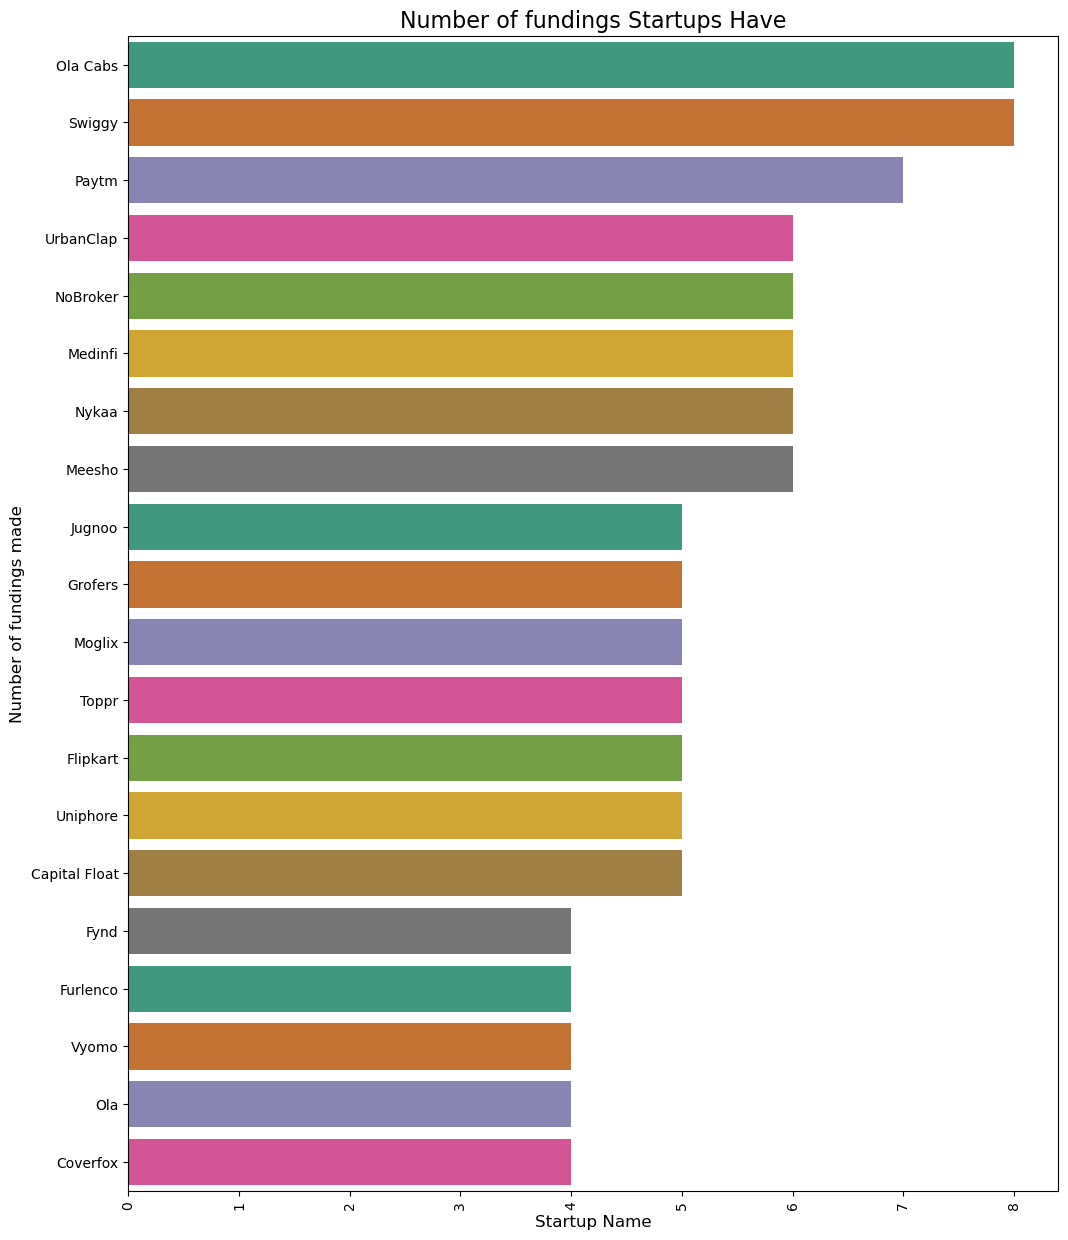

In [ ]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

# Which Kind of Industries are more preferred for Startups?


In [ ]:
# data cleaning
data[data['IndustryVertical']=='nan']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2873,2874,02/03/2015,TrulyMadly.com,nan,nan,nan,"Helion Venture Partners, Kae Capital",Private Equity,5500000.0,201503
2874,2875,02/03/2015,InstaLively,nan,nan,nan,Group of Angel Investors,Seed Funding,120000.0,201503
2875,2876,03/03/2015,Vserv,nan,nan,nan,"Maverick Capital, IDG Ventures India",Private Equity,15000000.0,201503
2876,2877,03/03/2015,Intruo.com,nan,nan,nan,"Ashutosh Lawania, Alok Goel & others",Seed Funding,-999.0,201503
2877,2878,05/03/2015,Niffler,nan,nan,nan,SAIF Partners,Seed Funding,1000000.0,201503
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,nan,nan,nan,Asia Pacific Internet Group,Private Equity,4500000.0,201501
3040,3041,29/01/2015,Graphene,nan,nan,nan,KARSEMVEN Fund,Private Equity,825000.0,201501
3041,3042,30/01/2015,Mad Street Den,nan,nan,nan,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,201501
3042,3043,30/01/2015,Simplotel,nan,nan,nan,MakeMyTrip,Private Equity,-999.0,201501


In [ ]:
data = data[data['IndustryVertical'] != 'nan']

In [ ]:
data[data['IndustryVertical']=='nan']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth


In [ ]:
industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

Consumer Internet    940
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: IndustryVertical, dtype: int64


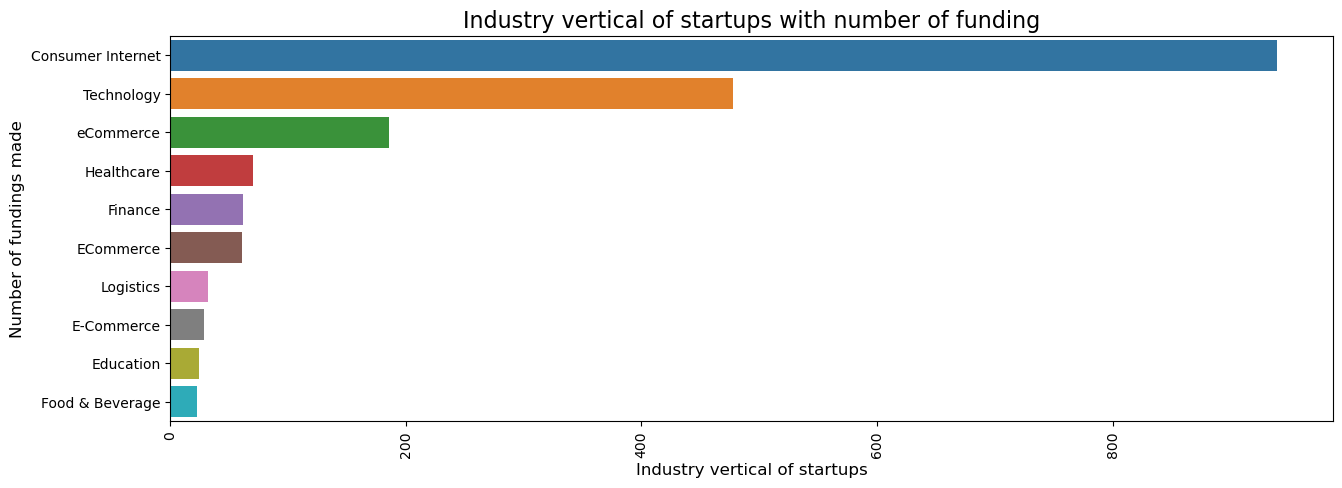

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(data,y=industry.index, x=industry.values)
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

# Does Location also play a role, In determining the Growth of a Startup?


In [ ]:
data['City']

0        Bengaluru
1          Gurgaon
2        Bengaluru
3        New Delhi
4           Mumbai
           ...    
2870     Bangalore
2871       Chennai
2872         Noida
3011    15/01/2015
3029    22/01/2015
Name: City, Length: 2875, dtype: object

In [ ]:
data['City'] = data['City'].replace('Bengaluru', 'Bangalore')

# Who plays the main role in Indian Startups Ecosystem?

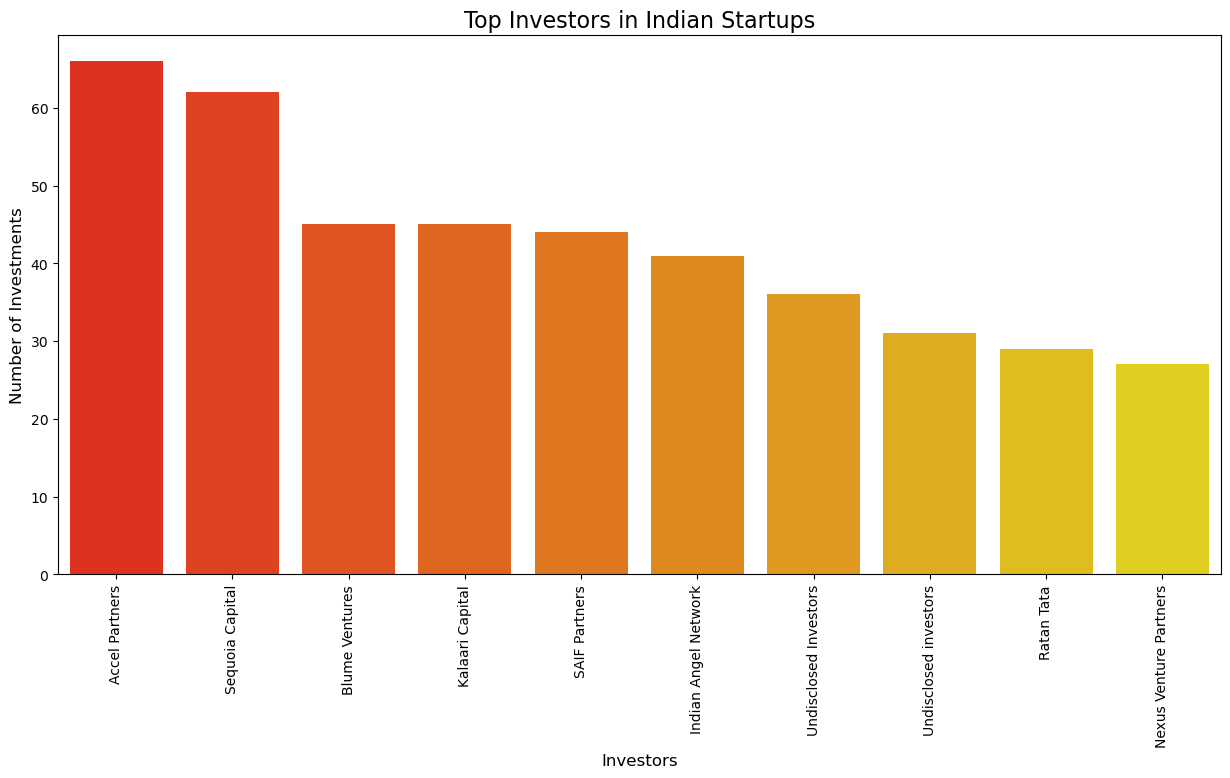

In [ ]:
investors_data = data['InvestorsName'].str.split(', ').explode()
# Counting the number of investments made by each investor
investors_count = investors_data.value_counts().head(10)

# Plotting the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(data,x=investors_count.index, y=investors_count.values, palette='autumn')
plt.xticks(rotation=90)
plt.xlabel('Investors', fontsize=12)
plt.ylabel('Number of Investments', fontsize=12)
plt.title("Top Investors in Indian Startups", fontsize=16)
plt.show()

# What are the different Types of Funding for Startups?

In [ ]:
data = data[data['InvestorsName'] != 'nan']

# lets clean the dataset
data[data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data[data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data[data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data[data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data[data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data[data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'

In [ ]:
# lets check the value counts
investors = data['InvestorsName'].value_counts().head(10)
print(investors)


Undisclosed Investors    107
Indian Angel Network      24
Ratan Tata                23
Kalaari Capital           15
Sequoia Capital           13
Accel Partners            12
Venture Catalysts         11
Brand Capital             11
RoundGlass Partners       10
Info Edge (India) Ltd      9
Name: InvestorsName, dtype: int64


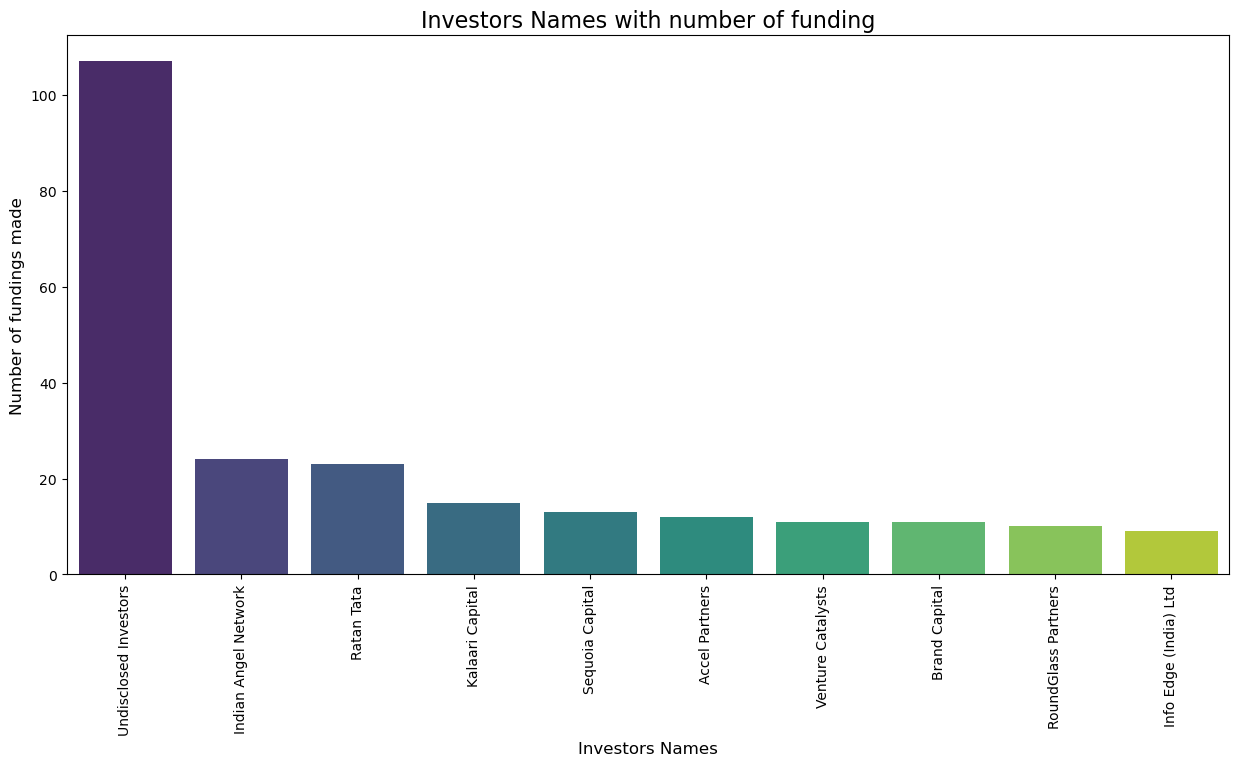

In [ ]:
# lets plot the data
sns.barplot(data, x=investors.index, y=investors.values, palette = 'viridis')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()